Data engineering
Step 0: import libraries;
Step 1: Explore the x-y relationship, and if there are missing data. X-y is not linear relationship, so I decide to use SVM, and test different kernels. There are no missing data in this dataset;

Model Building
1. Split the data to 80% training data and 20% test data
2. We don't have al ot of training data. Cross validation is useful to select optimal parameters 


Questions
1. Reads data into pandas dataframe

Answer: Please see S1 solution for Q1. 

2. Compute min, max, average, standard deviation, and the geometric mean for X, Y

Answer: 
x_min 0.21
y_min 1.124
x_max 10.02
y_max 7.498
x_average 5.4991
y_average 3.52513
x_standard deviation 2.67292111044
y_standard deviation 1.73459144117
x_geometric mean 4.4953243612
y_geometric mean 3.10830980506

3. How would you write out the dataframe to a SQL table?

Answer: Thursday

4. Generates a predictive model of Y based on X (submit code and results); describe your
approach

Answer: 
1. Split the data to 80% training data and 20% test data
2. We don't have a lot of training data. Cross validation is useful to select optimized parameters. I write code to select best parameters with GridSearchCV. The parameters to be determined for rbf kernel is gamma and c. The parameters to be determined for poly kernel is degree, coef0, gamma and c. 3-fold cross validation. Then I use the best parameters to train model.   


5. Assess the accuracy of your predictive model

Answer: MSE on test data 0.00282550841707
R^2 score on test data 0.99882852914



In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn import model_selection



O:\Users\xuan\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


S1 solution for Q1

In [2]:
df=pd.read_csv('Programming_Part1_TTI_Challenge.csv', sep='\t') 

In [3]:
display(df.head())

,Class,PartNo,X,Y
0,AAA,X135,0.21,1.124
1,AAA,X126,0.21,1.179
2,EBHA,X195,0.32,1.191
3,EBHA,X194,0.82,1.249
4,AAA,X139,0.81,1.255


In [4]:
display(df.describe(include='all'))

,Class,PartNo,X,Y
count,100,100,100.000000,100.000000
unique,3,100,NaN,NaN
top,EBHA,X120,NaN,NaN
freq,41,1,NaN,NaN
mean,NaN,NaN,5.499100,3.525130
std,NaN,NaN,2.672921,1.734591
min,NaN,NaN,0.210000,1.124000
25%,NaN,NaN,3.515000,2.086250
50%,NaN,NaN,5.310000,2.974000
75%,NaN,NaN,7.810000,4.919500


Explore the x-y relationship. It is not a linear relationship.

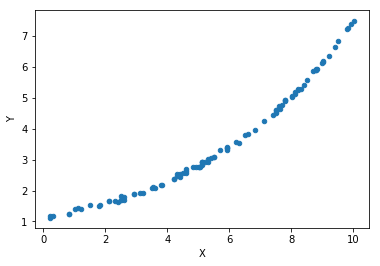

In [5]:
df.plot(x="X", y="Y", kind='scatter')
plt.show()

S2 solution for Q2

In [6]:
x_mean=df.X.mean()
y_mean=df.Y.mean()
x_min=df.X.min()
y_min=df.Y.min()
x_max=df.X.max()
y_max=df.Y.max()
x_std=df.X.std()
y_std=df.Y.std()
x_gmean=stats.gmean(df.X)
y_gmean=stats.gmean(df.Y)
print "x_min", x_min
print "y_min", y_min 
print "x_max", x_max 
print "y_max", y_max 
print "x_average", x_mean
print "y_average", y_mean 
print "x_standard deviation", x_std 
print "y_standard deviation", y_std
print "x_geometric mean", x_gmean
print "y_geometric mean", y_gmean 


x_min 0.21
y_min 1.124
x_max 10.02
y_max 7.498
x_average 5.4991
y_average 3.52513
x_standard deviation 2.67292111044
y_standard deviation 1.73459144117
x_geometric mean 4.4953243612
y_geometric mean 3.10830980506


Separate training and testing data

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df.X.reshape(-1, 1), df.Y, test_size=0.2, random_state=42)
print x_train.shape, x_test.shape, y_train.shape, y_test.shape

(80L, 1L) (20L, 1L) (80L,) (20L,)


O:\Users\xuan\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [11]:
#use gridsearch to slect best parameters for rbf and poly kernels.
space = [{'kernel':['rbf'], 'gamma': [0.01, 0.1,0.2], 'C': [10,100,500,1000]},
                    {'kernel':['poly'], 'degree': [2, 3],  'gamma': [0.01,0.1,0.2],'C': [1,10, 100], 'coef0': [0, 1]}
    ]
         
for param_grid in space:
    model = SVR()
    model_search = model_selection.GridSearchCV(estimator=model, param_grid = param_grid, cv=3)
    model_search.fit(x_train,y_train)
    print "Best params: %s " % model_search.best_params_


Best params: {'kernel': 'rbf', 'C': 500, 'gamma': 0.01} 
Best params: {'kernel': 'poly', 'C': 1, 'coef0': 1, 'gamma': 0.1, 'degree': 3} 


Use best parameter to train model

In [31]:
model = SVR(kernel='poly', C=1, degree=3, coef0= 1, gamma=0.1).fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print "MSE on training data", mean_squared_error(y_train, pred_train)
print "MSE on test data", mean_squared_error(y_test, pred_test)
print "R^2 score", model.score(x_test, y_test)

MSE on training data 0.00263043041837
MSE on test data 0.00362989007349
R^2 score 0.998495028215


In [32]:
model = SVR(kernel='rbf', C=500, gamma=0.01).fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print "MSE on training data", mean_squared_error(y_train, pred_train)
print "MSE on test data", mean_squared_error(y_test, pred_test)
print "R^2 score", model.score(x_test, y_test)

MSE on training data 0.00274978634581
MSE on test data 0.00282550841707
R^2 score 0.99882852914


rbf kernel performs a little better than poly kernel. However as I mentioned previously, the dataset is small, so if we have more data in the future, we definately need to train the model again.

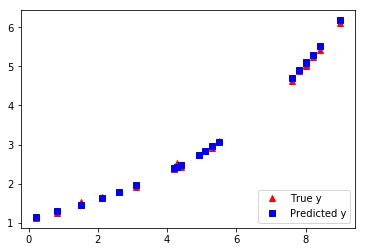

In [27]:
#show a simple plot
true_y=plt.plot(x_test,y_test, 'r^', label='True y')
pred_y=plt.plot(x_test, pred_test, 'bs', label='Predicted y')
legend = plt.legend(loc='lower right')

plt.show()